In [9]:
import pandas as pd
import numpy as np

In [10]:
from classes.vqa_model_predictor import VqaModelPredictor, DefaultVqaModelPredictor
from common.DAL import get_models_data_frame, get_model
from common.DAL import ModelScore
from common import DAL

from evaluate.VqaMedEvaluatorBase import VqaMedEvaluatorBase
from common.functions import get_highlighted_function_code
import vqa_logger 


In [11]:
df_models = get_models_data_frame()
try:
    df_show = df_models.sort_values(by=['wbss', 'bleu'], ascending=False).head()
except KeyError: #if no scode yet
    df_show = df_models
    df_show['wbss'] = np.nan
    df_show['bleu'] = np.nan

    
df_show.tail()

,wbss,bleu,model_id,models,val_accuracy,precsision,class_strategy,id,precsision_val,parameter_count,...,f1_score,image_base_net,notes,f1_score_val,loss,recall,val_loss,recall_val,accuracy,model_scores
3,0.438393,0.475423,4,"Model(id=4,\n\tmodel_location=C:\Users\Public\...",0.4600,0.221935,None,4,0.230500,20153852,...,None,vgg19,First model with Answers as labels\n\nmodel_lo...,None,-0.446679,0.646282,-0.482220,0.645632,0.418025,"[ModelScore(model_id=4, bleu=0.475422947892968..."
2,0.295299,0.416669,3,"Model(id=3,\n\tmodel_location=C:\Users\Public\...",0.3330,0.153593,None,3,0.198990,20160839,...,None,vgg19,First model with no LSTM\n\nmodel_location = '...,None,-0.421479,NaN,-0.454550,NaN,0.299840,"[ModelScore(model_id=3, bleu=0.416669234684865..."
0,0.253658,0.344659,1,"Model(id=1,\n\tmodel_location=C:\Users\Public\...",0.2040,0.285938,None,1,0.336569,20216455,...,None,vgg19,First 2019 model,None,-0.264820,0.189848,-0.285407,0.232202,0.169138,"[ModelScore(model_id=1, bleu=0.344658670979377..."
1,0.243435,0.328239,2,"Model(id=2,\n\tmodel_location=C:\Users\Public\...",0.1905,0.145030,None,2,0.235253,20086855,...,None,vgg19,First model with 65k params,None,-0.264334,NaN,-0.281248,0.229424,0.171093,"[ModelScore(model_id=2, bleu=0.328238898126765..."


In [12]:
import logging
import  vqa_logger 
logger = logging.getLogger(__name__)
import IPython


In [13]:
model_id = None#int(model_id)
mp = DefaultVqaModelPredictor(model_id)
mp

[2019-02-22 16:03:34][DEBUG] Getting model #4 (First model with Answers as labels

model_location = 'C:\Users\Public\Documents\Data\2019\models\20190222_1441_26\vqa_model.h5')
[2019-02-22 16:03:38][DEBUG] Loading Model: 0:00:03.619100
[2019-02-22 16:03:38][DEBUG] loading processed data from:
C:\Users\avitu\Documents\GitHub\VQA-MED\VQA-MED\VQA.Python\data\model_input.parquet
[2019-02-22 16:03:38][DEBUG] loading parquet from:
C:\Users\avitu\Documents\GitHub\VQA-MED\VQA-MED\VQA.Python\data\model_input.parquet
[2019-02-22 16:03:38][DEBUG] Loading parquet: 0:00:00.000069
[2019-02-22 16:03:38][WARNING] No data found for test set
[2019-02-22 16:03:38][DEBUG] loading processed data from:
C:\Users\avitu\Documents\GitHub\VQA-MED\VQA-MED\VQA.Python\data\model_input.parquet
[2019-02-22 16:03:38][DEBUG] loading parquet from:
C:\Users\avitu\Documents\GitHub\VQA-MED\VQA-MED\VQA.Python\data\model_input.parquet
[2019-02-22 16:03:39][DEBUG] Loading parquet: 0:00:00.515545
[2019-02-22 16:03:39][DEBUG] Co

In [14]:
mp.df_validation.head(2)

,image_name,question,answer,path,processed_question,processed_answer,diagnosis,question_category,answer_embedding,question_embedding,group
12792,synpic54733.jpg,what imaging modality was used to take this im...,ct with iv contrast,C:\Users\Public\Documents\Data\2019\validation...,imaging modality used take image?,ct iv contrast,,Modality,"[0.9566164016723633, 1.1977665424346924, 0.992...","[-0.38250797986984253, 2.5355920791625977, -1....",validation
12793,synpic25647.jpg,what kind of scan is this?,xr - plain film,C:\Users\Public\Documents\Data\2019\validation...,kind scan this?,xr - plain film,,Modality,"[2.1364431381225586, 0.8484694957733154, -0.96...","[-0.01856657862663269, 0.7099074125289917, -1....",validation


In [15]:
code = get_highlighted_function_code(mp.predict,remove_comments=False)
IPython.display.display(code)

In [16]:
df_data = mp.df_validation
df_predictions = mp.predict(mp.df_validation)
df_predictions.head()

[2019-02-22 16:04:23][DEBUG] Raw model prediction: 0:00:27.955400


,answer,image_name,question,prediction,probabilities,path
index,,,,,,
12792,ct with iv contrast,synpic54733.jpg,what imaging modality was used to take this im...,ct noncontrast,[(0.331)],C:\Users\Public\Documents\Data\2019\validation...
12793,xr - plain film,synpic25647.jpg,what kind of scan is this?,xr - plain film,[(0.377)],C:\Users\Public\Documents\Data\2019\validation...
12794,no,synpic35681.jpg,was the mri taken with contrast?,yes,[(0.553)],C:\Users\Public\Documents\Data\2019\validation...
12795,t2,synpic39641.jpg,"is this a t1 weighted, t2 weighted, or flair i...",t2,[(0.940)],C:\Users\Public\Documents\Data\2019\validation...
12796,yes,synpic35693.jpg,is this a noncontrast mri?,yes,[(0.544)],C:\Users\Public\Documents\Data\2019\validation...


In [17]:
df_predictions.describe()

,answer,image_name,question,prediction,probabilities,path
count,2000,2000,2000,2000,2000,2000
unique,470,500,186,17,626,500
top,axial,synpic28051.jpg,what abnormality is seen in the image?,skull contents,[(0.345)],C:\Users\Public\Documents\Data\2019\validation...
freq,213,4,133,337,11,4


#### Take a look at results for a single image:

In [33]:

image_name = df_predictions.image_name.sample(1).values[0]

df_image = df_predictions[df_predictions.image_name == image_name]
# print(f'Result: {set(df_image.prediction)}')

image_path = df_image.path.values[0]

def get_row_evaluation(row, metric):
    return VqaMedEvaluatorBase.get_all_evaluation(predictions=[row.prediction], ground_truth=[row.answer])[metric]

df_image['wbss'] = df_image.apply(lambda row: get_row_evaluation(row, 'wbss'), axis=1)
df_image['bleu'] = df_image.apply(lambda row: get_row_evaluation(row, 'bleu'), axis=1)
df_image

,answer,image_name,question,prediction,probabilities,path,wbss,bleu
index,,,,,,,,
13058,no,synpic35180.jpg,was gi contrast given to the patient?,contrast,[(0.041)],C:\Users\Public\Documents\Data\2019\validation...,0.099751,0.0
13558,axial,synpic35180.jpg,what imaging plane is depicted here?,axial,[(0.600)],C:\Users\Public\Documents\Data\2019\validation...,1.000000,1.0
14058,genitourinary,synpic35180.jpg,what organ system is primarily present in this...,skull contents,[(0.369)],C:\Users\Public\Documents\Data\2019\validation...,0.000000,0.0
14558,wilms tumor,synpic35180.jpg,what is most alarming about this ct scan?,us - ultrasound,[(0.353)],C:\Users\Public\Documents\Data\2019\validation...,0.024959,0.0


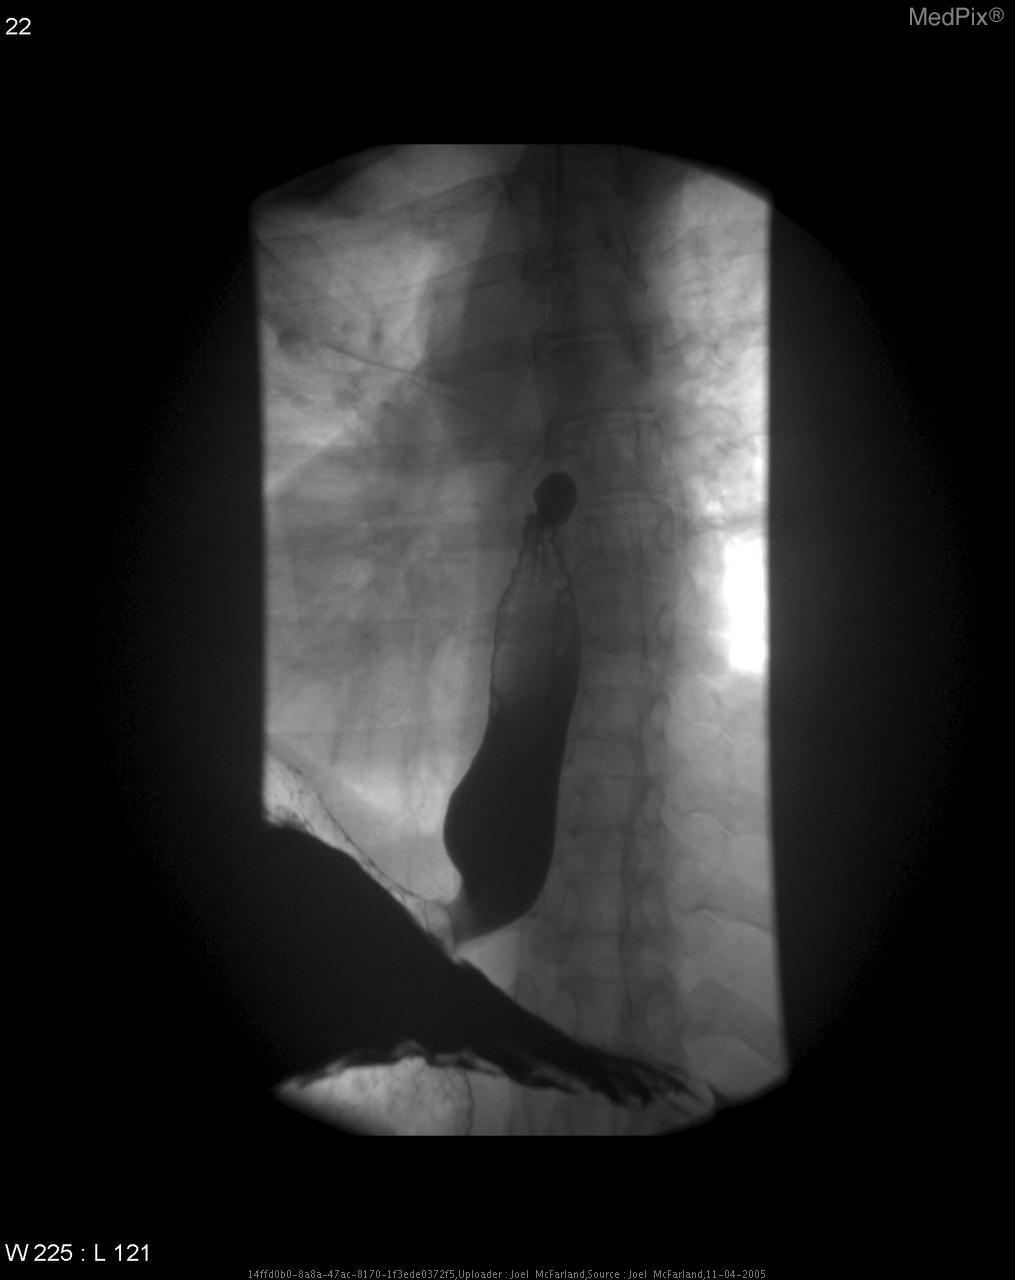

In [19]:
from IPython.display import Image, HTML, display_html
image = Image(filename = image_path, width=400, height=400)
image

## Evaluating the Model

In [20]:
validation_prediction = df_predictions
predictions = validation_prediction.prediction.values
ground_truth = validation_prediction.answer.values
results = VqaMedEvaluatorBase.get_all_evaluation(predictions=predictions, ground_truth=ground_truth)
print(f'Got results of\n{results}')

Got results of
{'bleu': 0.4489229478929681, 'wbss': 0.44856363437094127}


##### Add the core to DB:

In [21]:
model_db_id = mp.model_idx_in_db
assert model_db_id >= 0 
model_db_id

4

In [22]:
bleu = results['bleu']
wbss = results['wbss']
model_score = ModelScore(model_db_id, bleu=bleu, wbss=wbss)
model_score

ModelScore(model_id=4, bleu=0.4489229478929681, wbss=0.44856363437094127)

In [24]:
DAL.insert_dal(model_score)